In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

pd.set_option('display.max_columns', None)



In [7]:
from google.colab import files
uploaded = files.upload()

Saving historical_data.csv to historical_data (1).csv
Saving fear_greed_index.csv to fear_greed_index (1).csv


In [9]:
trader_df = pd.read_csv("historical_data.csv")
sentiment_df = pd.read_csv("fear_greed_index.csv")

print(trader_df.head())
print(sentiment_df.head())


                                      Account  Coin  Execution Price  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   

   Size Tokens  Size USD Side     Timestamp IST  Start Position Direction  \
0       986.87   7872.16  BUY  02-12-2024 22:50        0.000000       Buy   
1        16.00    127.68  BUY  02-12-2024 22:50      986.524596       Buy   
2       144.09   1150.63  BUY  02-12-2024 22:50     1002.518996       Buy   
3       142.98   1142.04  BUY  02-12-2024 22:50     1146.558564       Buy   
4         8.73     69.75  BUY  02-12-2024 22:50     1289.488521       Buy   

   Closed PnL                                   Transaction Hash     Order ID  \
0         0.0  0xec0945

In [10]:
trader_df.info()
sentiment_df.info()

trader_df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  float64
dtypes: bool(1), float64(

,Execution Price,Size Tokens,Size USD,Start Position,Closed PnL,Order ID,Fee,Trade ID,Timestamp
count,211224.000000,2.112240e+05,2.112240e+05,2.112240e+05,211224.000000,2.112240e+05,211224.000000,2.112240e+05,2.112240e+05
mean,11414.723350,4.623365e+03,5.639451e+03,-2.994625e+04,48.749001,6.965388e+10,1.163967,5.628549e+14,1.737744e+12
std,29447.654868,1.042729e+05,3.657514e+04,6.738074e+05,919.164828,1.835753e+10,6.758854,3.257565e+14,8.689920e+09
min,0.000005,8.740000e-07,0.000000e+00,-1.433463e+07,-117990.104100,1.732711e+08,-1.175712,0.000000e+00,1.680000e+12
25%,4.854700,2.940000e+00,1.937900e+02,-3.762311e+02,0.000000,5.983853e+10,0.016121,2.810000e+14,1.740000e+12
50%,18.280000,3.200000e+01,5.970450e+02,8.472793e+01,0.000000,7.442939e+10,0.089578,5.620000e+14,1.740000e+12
75%,101.580000,1.879025e+02,2.058960e+03,9.337278e+03,5.792797,8.335543e+10,0.393811,8.460000e+14,1.740000e+12
max,109004.000000,1.582244e+07,3.921431e+06,3.050948e+07,135329.090100,9.014923e+10,837.471593,1.130000e+15,1.750000e+12


In [15]:
# Convert trader time column to datetime
trader_df['Timestamp IST'] = pd.to_datetime(trader_df['Timestamp IST'], format='%d-%m-%Y %H:%M')

# Extract date
trader_df['Date'] = trader_df['Timestamp IST'].dt.date

# Convert sentiment date
sentiment_df['date'] = pd.to_datetime(sentiment_df['date']).dt.date


In [22]:
trader_df.isna().sum()

# Drop rows with missing PnL
trader_df = trader_df.dropna(subset=['Closed PnL'])

In [23]:
trader_df.columns = trader_df.columns.str.lower().str.replace(" ", "_")
sentiment_df.columns = sentiment_df.columns.str.lower()

In [24]:
import os

os.makedirs("csv_files", exist_ok=True)
os.makedirs("outputs", exist_ok=True)


In [25]:
trader_df.to_csv("csv_files/clean_trader_data.csv", index=False)
sentiment_df.to_csv("csv_files/clean_sentiment_data.csv", index=False)


In [26]:
merged_df = pd.merge(
    trader_df,
    sentiment_df,
    on='date',
    how='left'
)

merged_df.head()


,account,coin,execution_price,size_tokens,size_usd,side,timestamp_ist,start_position,direction,closed_pnl,transaction_hash,order_id,crossed,fee,trade_id,timestamp_x,date,timestamp_y,value,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02,1.733117e+09,80.0,Extreme Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02,1.733117e+09,80.0,Extreme Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02,1.733117e+09,80.0,Extreme Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02,1.733117e+09,80.0,Extreme Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02,1.733117e+09,80.0,Extreme Greed


In [27]:
merged_df.to_csv("csv_files/merged_data.csv", index=False)


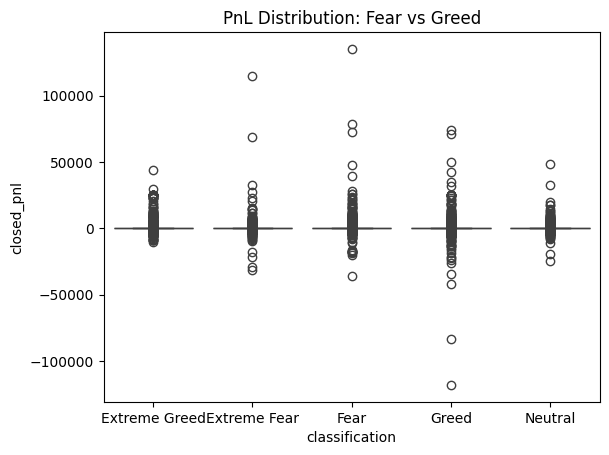

In [30]:
plt.figure()
sns.boxplot(
    data=merged_df,
    x='classification',
    y='closed_pnl'
)
plt.title("PnL Distribution: Fear vs Greed")
plt.savefig("outputs/pnl_vs_sentiment.png")
plt.show()

In [32]:
merged_df['leverage'] = merged_df['size_usd'] / merged_df['closed_pnl']
merged_df['leverage'] = merged_df['leverage'].replace([np.inf, -np.inf], np.nan)

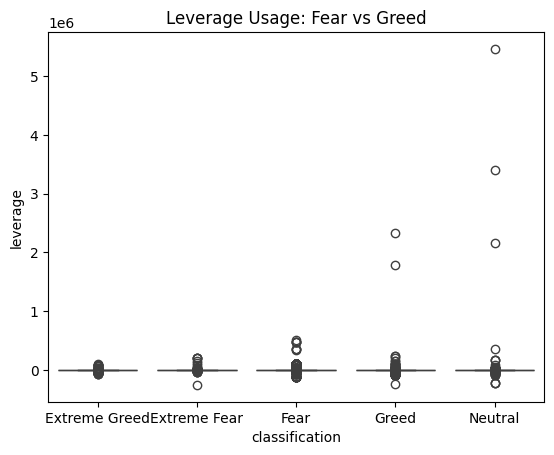

In [33]:
plt.figure()
sns.boxplot(
    data=merged_df,
    x='classification',
    y='leverage'
)
plt.title("Leverage Usage: Fear vs Greed")
plt.savefig("outputs/leverage_vs_sentiment.png")
plt.show()

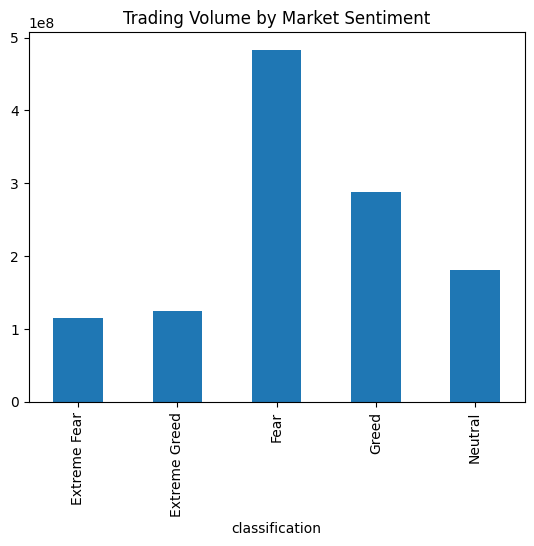

In [37]:
volume_sentiment = merged_df.groupby('classification')['size_usd'].sum()

plt.figure()
volume_sentiment.plot(kind='bar')
plt.title("Trading Volume by Market Sentiment")
plt.savefig("outputs/volume_vs_sentiment.png")
plt.show()

In [40]:
summary = merged_df.groupby('classification').agg(
    avg_pnl=('closed_pnl', 'mean'),
    median_leverage=('leverage', 'median'),
    total_volume=('size_usd', 'sum'),
    trade_count=('account', 'count')
)

summary

,avg_pnl,median_leverage,total_volume,trade_count
classification,,,,
Extreme Fear,34.537862,30.655286,1.144843e+08,21400
Extreme Greed,67.892861,26.246236,1.244652e+08,39992
Fear,54.290400,58.025973,4.833248e+08,61837
Greed,42.743559,24.204852,2.885825e+08,50303
Neutral,34.307718,51.165606,1.802421e+08,37686


In [41]:
summary.to_csv("csv_files/sentiment_summary.csv")


In [42]:
files.download("csv_files/merged_data.csv")
files.download("outputs/pnl_vs_sentiment.png")
files.download("outputs/leverage_vs_sentiment.png")
files.download("outputs/volume_vs_sentiment.png")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>